In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
# === Caminhos ===
RESULTADOS_DIR = Path("Resultados/")

# === Configurações gerais ===
pd.set_option("display.max_columns", None)
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.grid"] = True

# === 1️⃣ Carregar dados ===
print("🎬 Carregando dados do IMDB limpo...\n")
df = pd.read_parquet(RESULTADOS_DIR / "IMDB_Limpo.parquet", engine="fastparquet")

print(f"✅ {len(df):,} registros e {df.shape[1]} colunas carregadas.")
display(df.head(5))

🎬 Carregando dados do IMDB limpo...

✅ 1,170,931 registros e 9 colunas carregadas.


,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000009,movie,Miss Jerry,Miss Jerry,1894,45.0,Romance,5.3,229.0
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,1897,100.0,"Documentary,News,Sport",5.3,573.0
2,tt0000502,movie,Bohemios,Bohemios,1905,100.0,Unknown,3.7,23.0
3,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,70.0,"Action,Adventure,Biography",6.0,1030.0
4,tt0000591,movie,The Prodigal Son,L'enfant prodigue,1907,90.0,Drama,5.3,34.0


In [3]:
# === 2️⃣ Visão geral ===
print("\n📊 Informações gerais do dataset:")
display(df.info())

print("\n📈 Estatísticas descritivas (variáveis numéricas):")
display(df.describe().T)


📊 Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170931 entries, 0 to 1170930
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   tconst          1170931 non-null  object 
 1   titleType       1170931 non-null  object 
 2   primaryTitle    1170927 non-null  object 
 3   originalTitle   1170927 non-null  object 
 4   startYear       1170931 non-null  int64  
 5   runtimeMinutes  1170931 non-null  float64
 6   genres          1170931 non-null  object 
 7   averageRating   1170931 non-null  float64
 8   numVotes        1170931 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 80.4+ MB


None


📈 Estatísticas descritivas (variáveis numéricas):


,count,mean,std,min,25%,50%,75%,max
startYear,1170931.0,1765.826184,641.200465,-1.0,1969.0,2005.0,2017.0,2032.0
runtimeMinutes,1170931.0,48.727787,3413.558908,-1.0,-1.0,44.0,87.0,3692080.0
averageRating,1170931.0,2.140583,3.746058,-1.0,-1.0,-1.0,6.2,10.0
numVotes,1170931.0,1207.506526,20970.298137,0.0,0.0,0.0,34.0,3110638.0


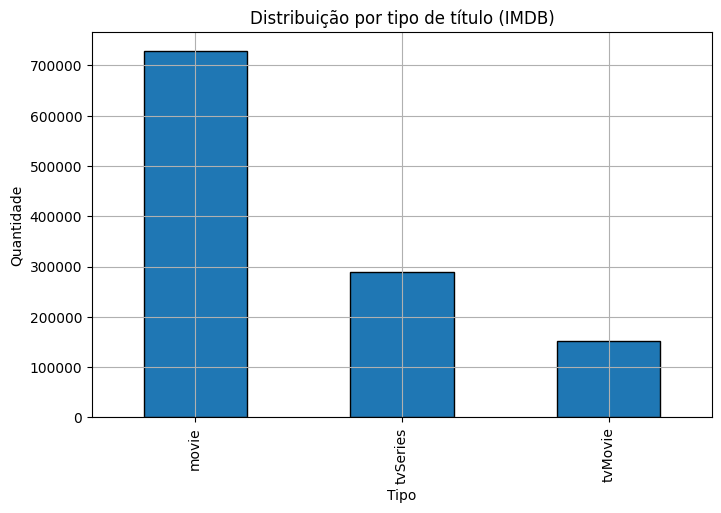

In [4]:
# === 3️⃣ Distribuição por tipo de título ===
plt.figure()
df["titleType"].value_counts().plot(kind="bar", edgecolor="black")
plt.title("Distribuição por tipo de título (IMDB)")
plt.xlabel("Tipo")
plt.ylabel("Quantidade")
plt.show()

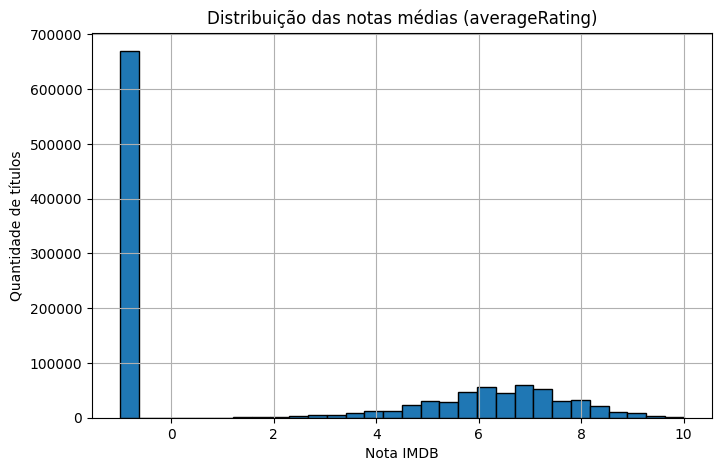

In [5]:
# === 4️⃣ Distribuição de notas médias ===
plt.figure()
df["averageRating"].plot(kind="hist", bins=30, edgecolor="black")
plt.title("Distribuição das notas médias (averageRating)")
plt.xlabel("Nota IMDB")
plt.ylabel("Quantidade de títulos")
plt.show()

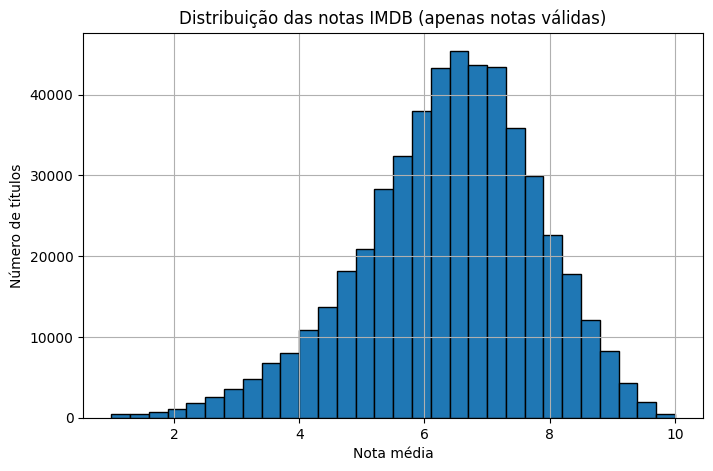

🎬 Total de títulos com nota válida: 501,259 de 1,170,931 (42.8%)
⭐ Média geral das notas válidas: 6.34


In [6]:
# === 🎯 Histograma das notas válidas (diferentes de -1) ===

plt.figure(figsize=(8, 5))

# Filtra apenas títulos com nota válida
df_validas = df[df["averageRating"] != -1]

# Cria histograma
plt.hist(df_validas["averageRating"], bins=30, edgecolor="black")
plt.title("Distribuição das notas IMDB (apenas notas válidas)")
plt.xlabel("Nota média")
plt.ylabel("Número de títulos")
plt.grid(True)
plt.show()

print(f"🎬 Total de títulos com nota válida: {len(df_validas):,} de {len(df):,} ({len(df_validas)/len(df):.1%})")
print(f"⭐ Média geral das notas válidas: {df_validas['averageRating'].mean():.2f}")

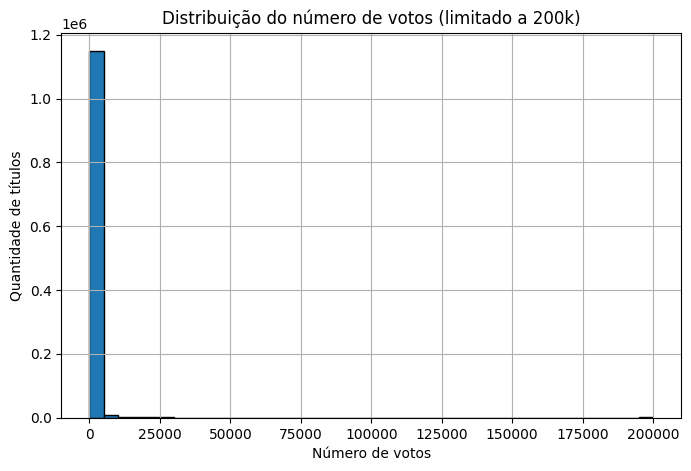

In [7]:
# === 5️⃣ Distribuição do número de votos ===
plt.figure()
df["numVotes"].apply(lambda x: min(x, 200_000)).plot(kind="hist", bins=40, edgecolor="black")
plt.title("Distribuição do número de votos (limitado a 200k)")
plt.xlabel("Número de votos")
plt.ylabel("Quantidade de títulos")
plt.show()

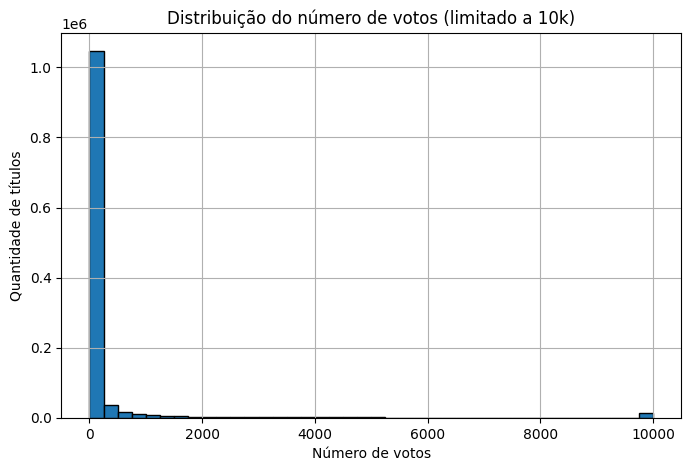

In [8]:
# === 5️⃣ Distribuição do número de votos ===
plt.figure()
df["numVotes"].apply(lambda x: min(x, 10_000)).plot(kind="hist", bins=40, edgecolor="black")
plt.title("Distribuição do número de votos (limitado a 10k)")
plt.xlabel("Número de votos")
plt.ylabel("Quantidade de títulos")
plt.show()

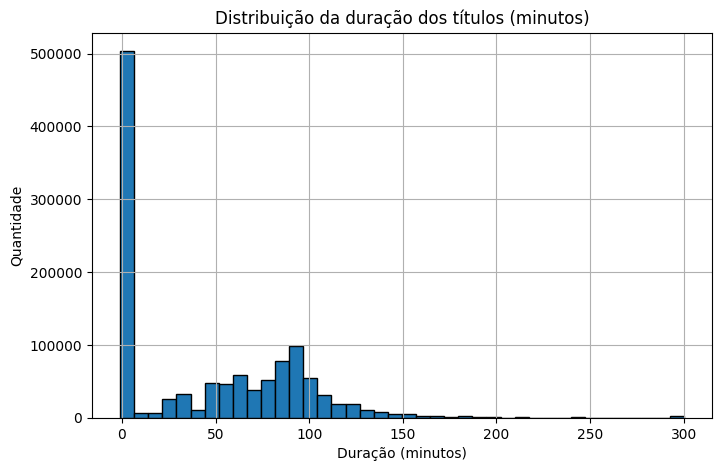

In [9]:
# === 6️⃣ Distribuição da duração (runtimeMinutes) ===
plt.figure()
df["runtimeMinutes"].apply(lambda x: min(x, 300)).plot(kind="hist", bins=40, edgecolor="black")
plt.title("Distribuição da duração dos títulos (minutos)")
plt.xlabel("Duração (minutos)")
plt.ylabel("Quantidade")
plt.show()

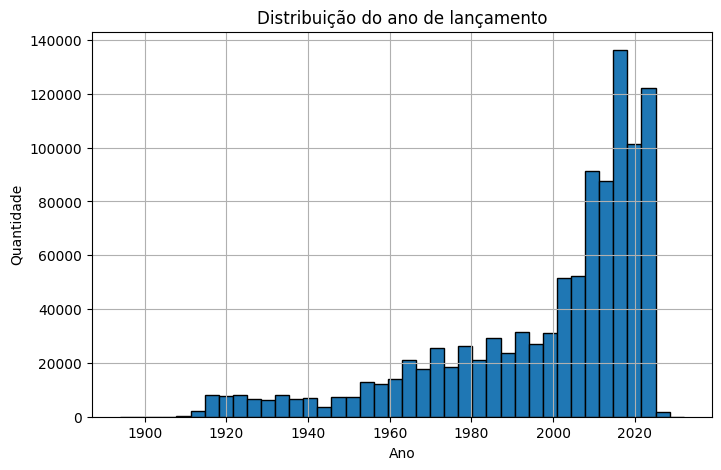

In [10]:
# === 7️⃣ Distribuição por ano de lançamento ===
plt.figure()
df["startYear"].replace(-1, pd.NA).dropna().astype(int).plot(kind="hist", bins=40, edgecolor="black")
plt.title("Distribuição do ano de lançamento")
plt.xlabel("Ano")
plt.ylabel("Quantidade")
plt.show()

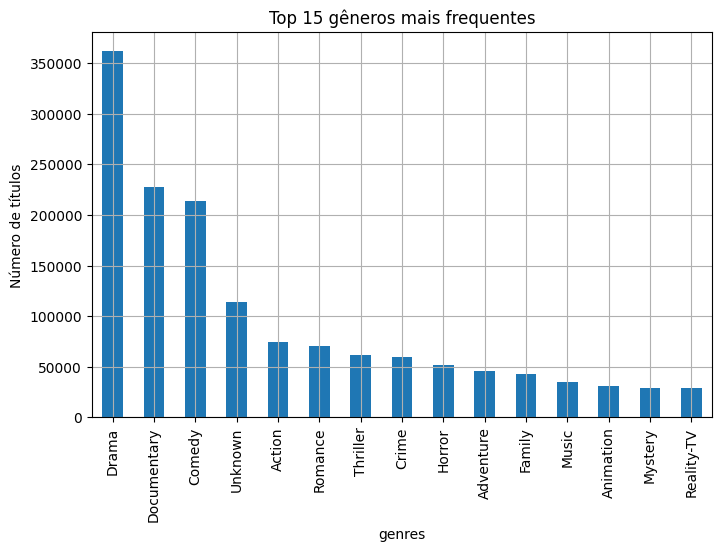


🎭 Tabela dos 15 gêneros mais comuns:


genres
Drama          362549
Documentary    227691
Comedy         213471
Unknown        114091
Action          74796
Romance         70598
Thriller        61396
Crime           59925
Horror          51469
Adventure       45721
Family          43075
Music           35302
Animation       31279
Mystery         28922
Reality-TV      28469
Name: count, dtype: int64

In [11]:
# === 8️⃣ Gêneros mais comuns ===
df["genres"] = df["genres"].fillna("Unknown")
generos_series = df["genres"].str.split(",").explode().str.strip()
top_generos = generos_series.value_counts().head(15)

plt.figure()
top_generos.plot(kind="bar")
plt.title("Top 15 gêneros mais frequentes")
plt.ylabel("Número de títulos")
plt.show()

print("\n🎭 Tabela dos 15 gêneros mais comuns:")
display(top_generos)

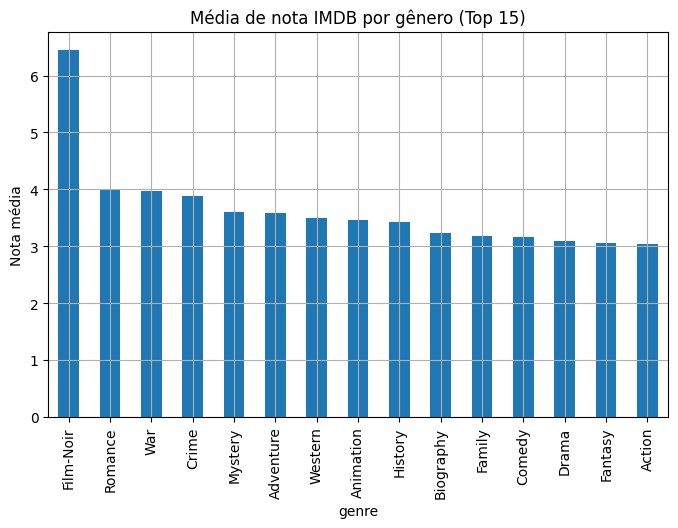

In [12]:
# === 9️⃣ Média de notas por gênero ===
# Expande os gêneros (um por linha)
df_gen = df.copy()
df_gen["genres"] = df_gen["genres"].fillna("Unknown")
df_gen = df_gen.assign(genre=df_gen["genres"].str.split(",")).explode("genre")
df_gen["genre"] = df_gen["genre"].str.strip()

# Calcula média de nota por gênero
media_genero = (
    df_gen.groupby("genre")["averageRating"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure()
media_genero.head(15).plot(kind="bar")
plt.title("Média de nota IMDB por gênero (Top 15)")
plt.ylabel("Nota média")
plt.show()


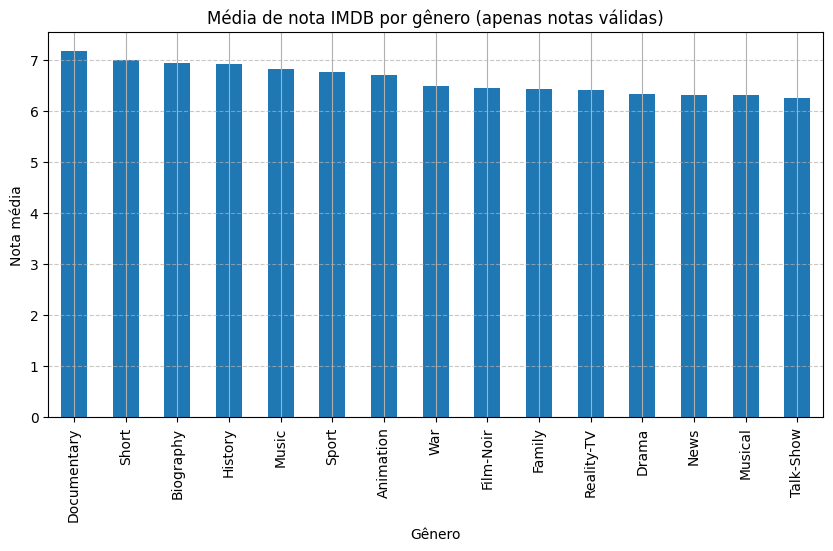

🎬 Total de títulos com nota válida considerados: 843,430
⭐ Número de gêneros únicos analisados: 29


In [13]:
# === 9️⃣ Média de notas por gênero (apenas notas válidas) ===

# Expande os gêneros (um por linha)
df_gen = df.copy()
df_gen["genres"] = df_gen["genres"].fillna("Unknown")
df_gen = df_gen.assign(genre=df_gen["genres"].str.split(",")).explode("genre")
df_gen["genre"] = df_gen["genre"].str.strip()

# Filtra apenas títulos com nota válida (averageRating != -1)
df_gen_validas = df_gen[df_gen["averageRating"] != -1].copy()

# Calcula média de nota por gênero
media_genero = (
    df_gen_validas.groupby("genre")["averageRating"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10, 5))
media_genero.head(15).plot(kind="bar")
plt.title("Média de nota IMDB por gênero (apenas notas válidas)")
plt.ylabel("Nota média")
plt.xlabel("Gênero")
plt.grid(True, axis="y", linestyle="--", alpha=0.7)
plt.show()

print(f"🎬 Total de títulos com nota válida considerados: {len(df_gen_validas):,}")
print(f"⭐ Número de gêneros únicos analisados: {df_gen_validas['genre'].nunique()}")

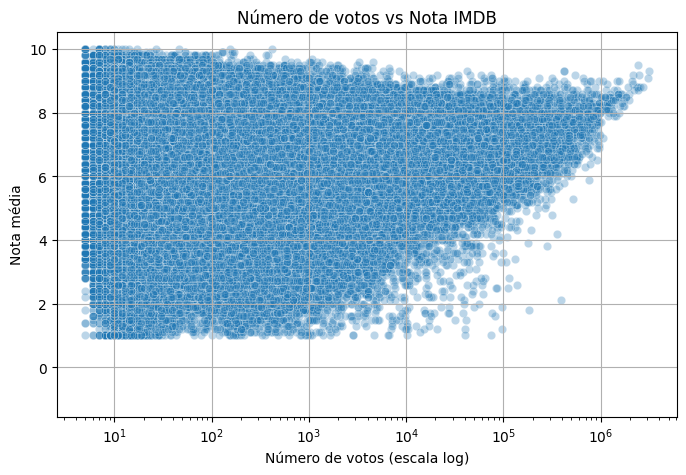

In [14]:
# === 🔟 Relação entre número de votos e nota ===
plt.figure()
sns.scatterplot(data=df, x="numVotes", y="averageRating", alpha=0.3)
plt.xscale("log")
plt.title("Número de votos vs Nota IMDB")
plt.xlabel("Número de votos (escala log)")
plt.ylabel("Nota média")
plt.show()

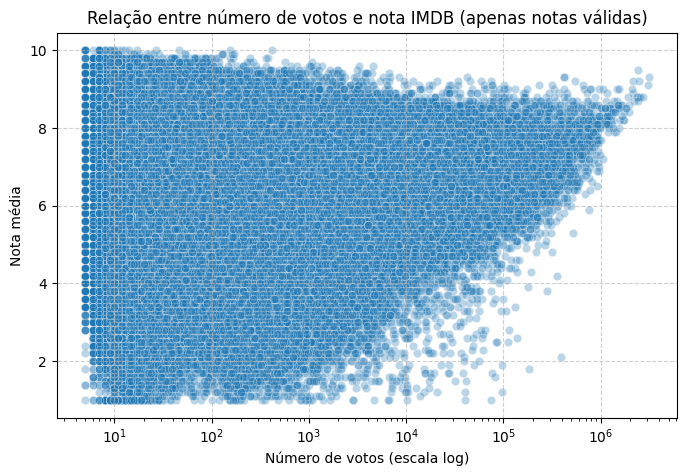

🎬 Total de títulos com nota válida: 501,259
📈 Faixa de votos (mín–máx): 5 – 3110638
⭐ Média geral das notas válidas: 6.34


In [15]:
# === 🔟 Relação entre número de votos e nota (apenas notas válidas) ===

# Filtra apenas títulos com nota válida
df_validas = df[df["averageRating"] != -1].copy()

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_validas, x="numVotes", y="averageRating", alpha=0.3)

plt.xscale("log")  # escala logarítmica no eixo de votos
plt.title("Relação entre número de votos e nota IMDB (apenas notas válidas)")
plt.xlabel("Número de votos (escala log)")
plt.ylabel("Nota média")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

print(f"🎬 Total de títulos com nota válida: {len(df_validas):,}")
print(f"📈 Faixa de votos (mín–máx): {int(df_validas['numVotes'].min())} – {int(df_validas['numVotes'].max())}")
print(f"⭐ Média geral das notas válidas: {df_validas['averageRating'].mean():.2f}")


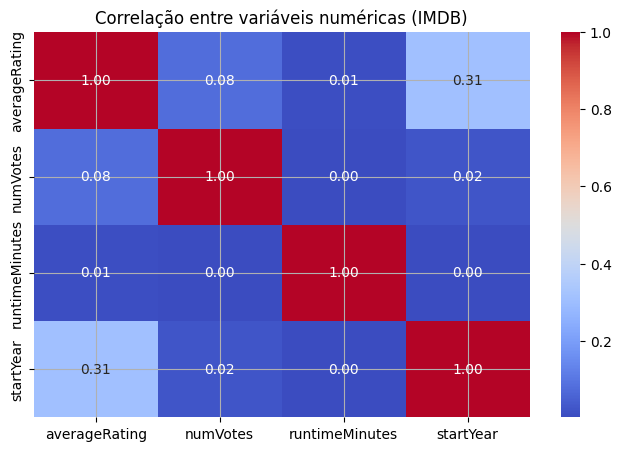

In [16]:
# === 11️⃣ Correlação entre variáveis numéricas ===
num_cols = ["averageRating", "numVotes", "runtimeMinutes", "startYear"]
corr = df[num_cols].corr()

plt.figure()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlação entre variáveis numéricas (IMDB)")
plt.show()

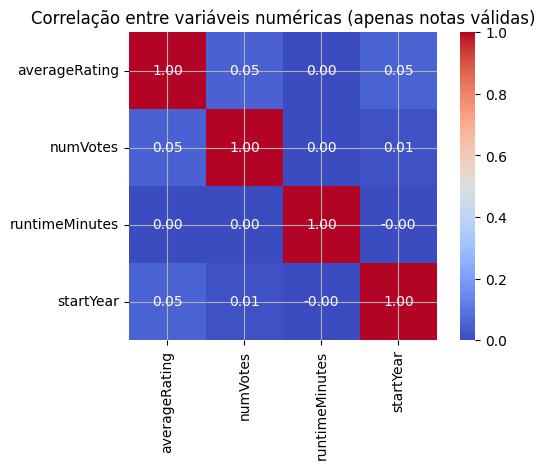

🎬 Total de títulos com nota válida: 501,259
📊 Correlações principais:


,averageRating,numVotes,runtimeMinutes,startYear
averageRating,1.000000,0.047717,0.000695,0.053427
numVotes,0.047717,1.000000,0.000507,0.013520
runtimeMinutes,0.000695,0.000507,1.000000,-0.000021
startYear,0.053427,0.013520,-0.000021,1.000000


In [17]:
# === 11️⃣ Correlação entre variáveis numéricas (apenas notas válidas) ===

# Filtra apenas títulos com nota válida
df_validas = df[df["averageRating"] != -1].copy()

# Seleciona as colunas numéricas de interesse
num_cols = ["averageRating", "numVotes", "runtimeMinutes", "startYear"]

# Calcula matriz de correlação
corr = df_validas[num_cols].corr()

# Plota o heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlação entre variáveis numéricas (apenas notas válidas)")
plt.show()

print(f"🎬 Total de títulos com nota válida: {len(df_validas):,}")
print("📊 Correlações principais:")
display(corr)


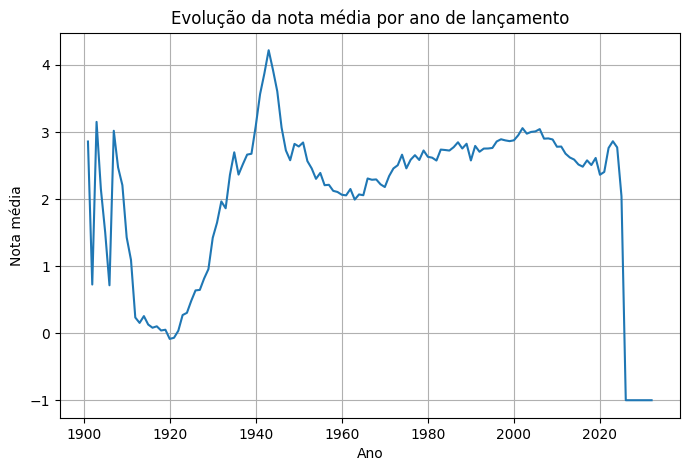

In [18]:
# === 12️⃣ Evolução da média de notas ao longo do tempo ===
media_ano = (
    df[df["startYear"] > 1900]
    .groupby("startYear")["averageRating"]
    .mean()
)

plt.figure()
media_ano.plot()
plt.title("Evolução da nota média por ano de lançamento")
plt.xlabel("Ano")
plt.ylabel("Nota média")
plt.show()

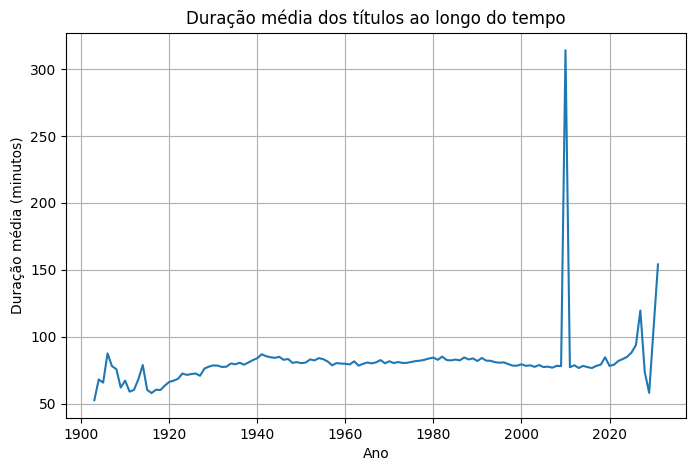

In [19]:
# === 13️⃣ Duração média ao longo dos anos ===
duracao_ano = (
    df[(df["startYear"] > 1900) & (df["runtimeMinutes"] > 0)]
    .groupby("startYear")["runtimeMinutes"]
    .mean()
)

plt.figure()
duracao_ano.plot()
plt.title("Duração média dos títulos ao longo do tempo")
plt.xlabel("Ano")
plt.ylabel("Duração média (minutos)")
plt.show()

In [20]:
# === 14️⃣ Títulos com notas extremas ===
print("\n🏆 Top 10 títulos com maiores notas:")
display(df.nlargest(10, "averageRating")[["primaryTitle", "averageRating", "numVotes", "startYear", "genres"]])

print("\n💩 10 títulos com menores notas:")
display(df.nsmallest(10, "averageRating")[["primaryTitle", "averageRating", "numVotes", "startYear", "genres"]])


🏆 Top 10 títulos com maiores notas:


,primaryTitle,averageRating,numVotes,startYear,genres
154710,El lambiscon verde,10.0,9.0,1991,Comedy
323733,Silenced as mercury rises,10.0,11.0,2021,Documentary
477088,Peanut Headz: Black History Toonz,10.0,7.0,2021,Animation
480418,Chenai Mur Dhulia,10.0,8.0,2005,"Drama,Romance"
508096,Quase Anjos: Edição Especial,10.0,5.0,2021,Comedy
697603,Premigala Gamanake,10.0,418.0,2025,Romance
701097,The Art Whisperer,10.0,17.0,2023,Documentary
803686,Living with Siblings,10.0,5.0,2020,Unknown
813000,The President and the Dragon,10.0,9.0,2024,Documentary
821498,Transpassing,10.0,8.0,2024,Drama



💩 10 títulos com menores notas:


,primaryTitle,averageRating,numVotes,startYear,genres
15,Fiesta de toros,-1.0,0.0,1909,Unknown
18,Gira política de Madero y Pino Suárez,-1.0,0.0,1909,Unknown
21,Lægens offer,-1.0,0.0,1909,Unknown
23,Niños en la alameda,-1.0,0.0,1909,Unknown
28,Smith's Knockabout Theatre,-1.0,0.0,1909,Unknown
31,O Terremoto de Benavente,-1.0,0.0,1909,Documentary
33,Two of the Boys,-1.0,0.0,1909,Unknown
35,Viernes de dolores,-1.0,0.0,1909,Unknown
37,L'aluminite,-1.0,0.0,1910,Unknown
43,The Butterfly,-1.0,0.0,1910,Unknown


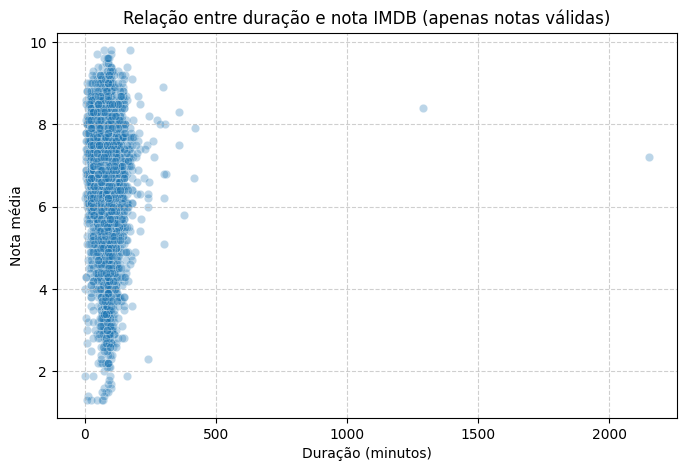

C:\Users\arviz\AppData\Local\Temp\ipykernel_30696\1308660366.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_duracao = df_validas.groupby("faixa_duracao")["averageRating"].mean()


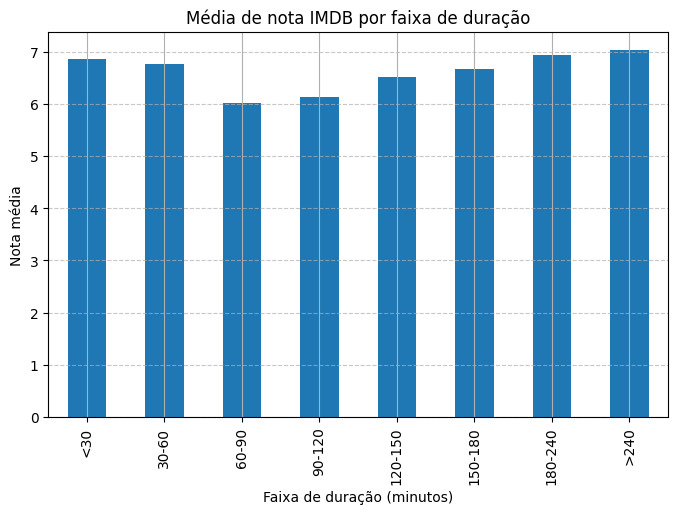

📊 Estatísticas de duração (em minutos):
count     408652.0
mean          95.7
std         5777.6
min            1.0
10%           45.0
25%           68.0
50%           88.0
75%          100.0
90%          120.0
max      3692080.0
Name: runtimeMinutes, dtype: float64

⭐ Média geral das notas válidas: 6.28
📈 Correlação duração × nota: 0.001


In [21]:
# === 15 Relação entre duração e nota (apenas notas válidas) ===

# Filtra apenas títulos com nota válida e duração positiva
df_validas = df[(df["averageRating"] != -1) & (df["runtimeMinutes"] > 0)].copy()

plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df_validas.sample(n=min(5000, len(df_validas)), random_state=42),
    x="runtimeMinutes", y="averageRating", alpha=0.3
)
plt.title("Relação entre duração e nota IMDB (apenas notas válidas)")
plt.xlabel("Duração (minutos)")
plt.ylabel("Nota média")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Agrupar por faixas de duração
bins = [0, 30, 60, 90, 120, 150, 180, 240, 1000]
labels = ["<30", "30-60", "60-90", "90-120", "120-150", "150-180", "180-240", ">240"]
df_validas["faixa_duracao"] = pd.cut(df_validas["runtimeMinutes"], bins=bins, labels=labels, include_lowest=True)

# Média de nota por faixa de duração
media_duracao = df_validas.groupby("faixa_duracao")["averageRating"].mean()

plt.figure(figsize=(8, 5))
media_duracao.plot(kind="bar")
plt.title("Média de nota IMDB por faixa de duração")
plt.xlabel("Faixa de duração (minutos)")
plt.ylabel("Nota média")
plt.grid(True, axis="y", linestyle="--", alpha=0.7)
plt.show()

print("📊 Estatísticas de duração (em minutos):")
print(df_validas["runtimeMinutes"].describe(percentiles=[.1, .25, .5, .75, .9]).round(1))

print("\n⭐ Média geral das notas válidas:", round(df_validas["averageRating"].mean(), 2))
print("📈 Correlação duração × nota:", round(df_validas["runtimeMinutes"].corr(df_validas["averageRating"]), 3))


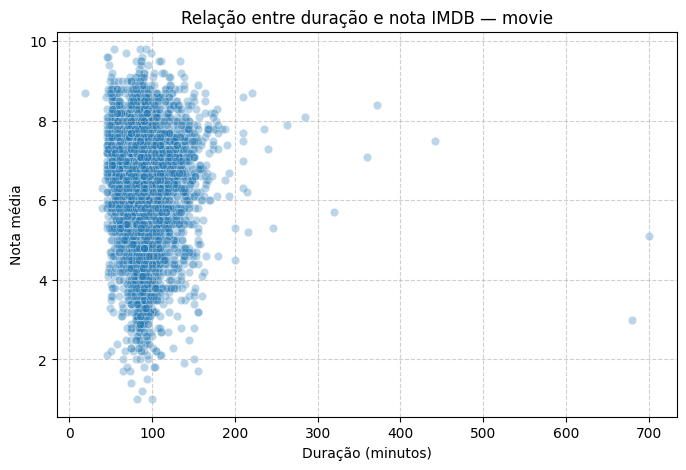

🎬 movie: 303,407 títulos analisados | Correlação duração × nota: 0.008



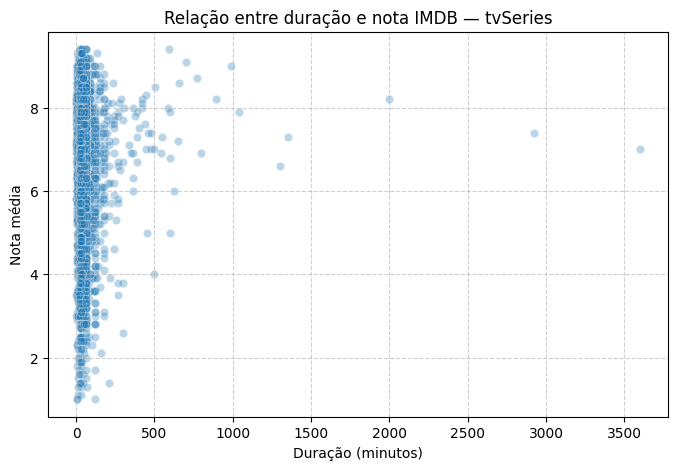

🎬 tvSeries: 57,441 títulos analisados | Correlação duração × nota: 0.003



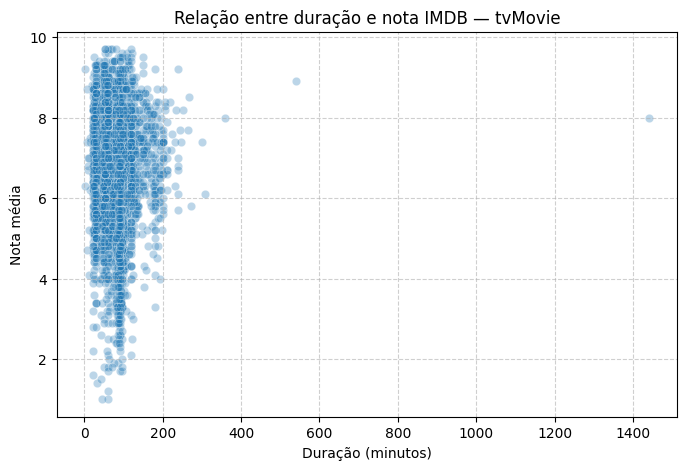

🎬 tvMovie: 47,804 títulos analisados | Correlação duração × nota: -0.042



In [22]:
# === 16 Relação entre duração e nota por tipo de título (apenas notas válidas) ===

# Filtrar apenas títulos com nota válida e duração positiva
df_validas = df[(df["averageRating"] != -1) & (df["runtimeMinutes"] > 0)].copy()

# Tipos principais
tipos_principais = ["movie", "tvSeries", "tvMovie"]

# Garante backend interativo
%matplotlib inline

# Loop com renderização explícita
for tipo in tipos_principais:
    df_tipo = df_validas[df_validas["titleType"] == tipo]

    if df_tipo.empty:
        print(f"⚠️ Nenhum título encontrado para o tipo: {tipo}")
        continue

    fig, ax = plt.subplots(figsize=(8, 5))
    sns.scatterplot(
        data=df_tipo.sample(n=min(5000, len(df_tipo)), random_state=42),
        x="runtimeMinutes", y="averageRating", alpha=0.3, ax=ax
    )
    ax.set_title(f"Relação entre duração e nota IMDB — {tipo}")
    ax.set_xlabel("Duração (minutos)")
    ax.set_ylabel("Nota média")
    ax.grid(True, linestyle="--", alpha=0.6)

    plt.show()  # força renderização imediata antes do próximo loop

    corr = df_tipo["runtimeMinutes"].corr(df_tipo["averageRating"])
    print(f"🎬 {tipo}: {len(df_tipo):,} títulos analisados | Correlação duração × nota: {corr:.3f}\n")